# Instalação e setup

[![](https://img.shields.io/badge/PyPi-ffffff?style=for-the-badge&logo=pypi)](https://pypi.org/)

- jupyter 1.0.0 - /project/jupyter/
- scikit-learn 1.0.1 - /project/scikit-learn/
- matplotlib 3.5.0 - /project/matplotlib/
- pandas 1.3.4 - /project/pandas/
- scipy 1.7.3 - /project/scipy/

# DBSCAN

## Considerações

`eps` - Raio da circunferência à volta de um ponto que representa a sua vizinhança

`MinPts` - Número mínimo de pontos que queremos ver na vizinhança de um ponto

Ponto **core**
- Número de vizinhos &ge; MinPts

Ponto **boundary**
- Número de vizinhos < MinPts
- Deve estar na vizinhança de um ponto **core**

Ponto **noise**
- Não é ponto **core** nem **boundary**

Aresta de densidade - Une dois pontos **core** que sejam vizinhos

Pontos conectados por densidade - Diz-se que dois pontos **core** _p_ e _q_ estão conectados por densidade, caso estejam conectados através de arestas de densidade

## Algoritmo

1. Classificar os pontos como **core**, **boundary** ou **noise**

![Diagrama](./files/dbscan1_core.png)

![Diagrama](./files/dbscan1_boundary.png)

![Diagrama](./files/dbscan1_noise.png)

2. Descartar os pontos **noise**

![Diagrama](./files/dbscan2.png)

3. Atribuir um cluster a um ponto **core**

![Diagrama](./files/dbscan3.png)

4. Colorir todos os pontos conectados por densidade desse ponto **core**

![Diagrama](./files/dbscan4.png)

5. Repetir os passos 3 e 4 para os restantes pontos **core**

![Diagrama](./files/dbscan5.png)

6. Colorir os pontos **boundary** de acordo com o ponto **core** mais próximo

![Diagrama](./files/dbscan6.png)

## Implementação em Python

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame

In [2]:
X, _ = make_blobs(n_samples = 500, centers =4, random_state = 20)

In [3]:
X

array([[-2.07640153e+00,  6.71309368e-01],
       [-4.05141162e+00, -6.07559053e-02],
       [-1.08926151e+01,  2.45602848e+00],
       [-3.02056676e+00,  8.67033840e-01],
       [ 3.06404542e+00,  6.95947265e+00],
       [-1.74229318e+00,  1.15797698e+00],
       [-8.99456167e+00,  5.47084313e+00],
       [-9.06883569e+00,  6.13732883e+00],
       [-2.23386447e+00,  5.57249399e-01],
       [ 2.52440212e+00,  6.30743081e+00],
       [ 7.18131362e+00,  7.51581430e+00],
       [-8.43921422e+00,  3.29676937e+00],
       [ 1.39755858e+00,  8.45104480e+00],
       [-9.32517983e+00,  3.67472525e+00],
       [-9.15258780e+00,  3.30589629e+00],
       [ 2.58780065e+00,  9.77647999e+00],
       [ 7.36048205e+00,  8.26149705e+00],
       [ 6.08325409e+00,  4.77203893e+00],
       [ 1.65680297e+00,  9.96417617e+00],
       [-9.32983662e+00,  3.95325826e+00],
       [ 6.87192800e+00,  5.98308486e+00],
       [ 3.61265990e+00,  7.77846810e+00],
       [ 9.07840534e-01,  7.44112945e+00],
       [-1.

In [4]:
X[:,0]

array([ -2.07640153,  -4.05141162, -10.89261506,  -3.02056676,
         3.06404542,  -1.74229318,  -8.99456167,  -9.06883569,
        -2.23386447,   2.52440212,   7.18131362,  -8.43921422,
         1.39755858,  -9.32517983,  -9.1525878 ,   2.58780065,
         7.36048205,   6.08325409,   1.65680297,  -9.32983662,
         6.871928  ,   3.6126599 ,   0.90784053, -10.30714524,
        -2.99186145,   2.9671273 ,  -1.52418676,   6.66754848,
        -3.18064334,  -1.81821168,  -2.13454157,  -2.67172248,
         1.05449252,   7.63724607,  -2.64993547, -11.9420011 ,
         6.65358641,   6.78523197,   8.75459274,  -1.86088663,
        -3.52047351,  -0.74916469, -10.13322883,  -1.38934229,
         8.9999488 ,  -9.08465974,  -3.5059831 ,   1.25442452,
       -10.4526414 ,  -3.03224676,  -7.8904889 ,  -9.64722873,
        -8.36742713,   1.89139437, -12.04854277,   2.82105811,
        -9.11898104,   9.13545281,  -8.31693442,  -9.11314613,
        -3.97079263,  -9.62930913,  -9.14419716, -10.98

In [5]:
X[:,1]

array([ 6.71309368e-01, -6.07559053e-02,  2.45602848e+00,  8.67033840e-01,
        6.95947265e+00,  1.15797698e+00,  5.47084313e+00,  6.13732883e+00,
        5.57249399e-01,  6.30743081e+00,  7.51581430e+00,  3.29676937e+00,
        8.45104480e+00,  3.67472525e+00,  3.30589629e+00,  9.77647999e+00,
        8.26149705e+00,  4.77203893e+00,  9.96417617e+00,  3.95325826e+00,
        5.98308486e+00,  7.77846810e+00,  7.44112945e+00,  2.39101083e+00,
       -1.28426312e+00,  9.30607075e+00,  3.91070015e-01,  7.07652492e+00,
       -1.47434142e-02,  2.11400171e+00,  8.04057776e-01,  1.79310594e+00,
        9.36841404e+00,  6.67306224e+00, -5.30260188e-01,  5.31374092e+00,
        5.85320371e+00,  5.36459066e+00,  4.71536869e+00,  1.81858466e-01,
        8.24130781e-02,  7.53700274e+00,  4.21786184e+00,  5.09291029e-01,
        6.25583465e+00,  4.36190775e+00,  1.86772933e+00,  7.45905880e+00,
        3.59661251e+00,  2.27849523e-01,  3.83294292e+00,  3.53316294e+00,
        3.37290108e+00,  

In [6]:
dict(x=X[:,0], y=X[:,1])

{'x': array([ -2.07640153,  -4.05141162, -10.89261506,  -3.02056676,
          3.06404542,  -1.74229318,  -8.99456167,  -9.06883569,
         -2.23386447,   2.52440212,   7.18131362,  -8.43921422,
          1.39755858,  -9.32517983,  -9.1525878 ,   2.58780065,
          7.36048205,   6.08325409,   1.65680297,  -9.32983662,
          6.871928  ,   3.6126599 ,   0.90784053, -10.30714524,
         -2.99186145,   2.9671273 ,  -1.52418676,   6.66754848,
         -3.18064334,  -1.81821168,  -2.13454157,  -2.67172248,
          1.05449252,   7.63724607,  -2.64993547, -11.9420011 ,
          6.65358641,   6.78523197,   8.75459274,  -1.86088663,
         -3.52047351,  -0.74916469, -10.13322883,  -1.38934229,
          8.9999488 ,  -9.08465974,  -3.5059831 ,   1.25442452,
        -10.4526414 ,  -3.03224676,  -7.8904889 ,  -9.64722873,
         -8.36742713,   1.89139437, -12.04854277,   2.82105811,
         -9.11898104,   9.13545281,  -8.31693442,  -9.11314613,
         -3.97079263,  -9.62930913,

In [7]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))

df.head()

,x,y
0,-2.076402,0.671309
1,-4.051412,-0.060756
2,-10.892615,2.456028
3,-3.020567,0.867034
4,3.064045,6.959473


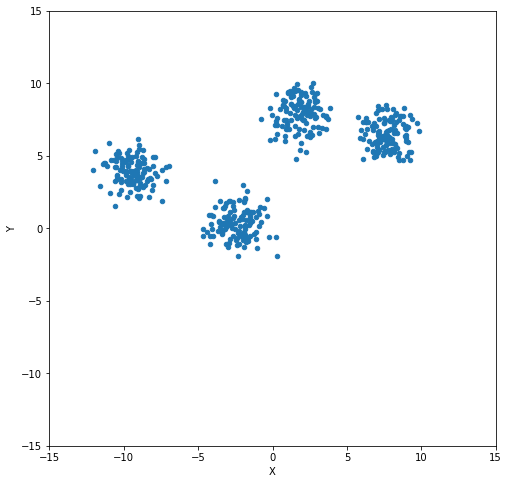

In [8]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
ax.set(xlim=(-15, 15), ylim=(-15,15))
df.plot(ax = ax, kind = "scatter", x = "x", y = "y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(X)
clusters = dbscan.labels_

In [10]:
clusters

array([ 0,  0,  1,  0,  2,  0,  1,  1,  0,  2,  3,  1,  2,  1,  1,  2,  3,
        3,  2,  1,  3,  2,  2,  1,  0,  2,  0,  3,  0,  0,  0,  0,  2,  3,
        0,  1,  3,  3,  3,  0,  0,  2,  1,  0,  3,  1,  0,  2,  1,  0,  1,
        1,  1,  2,  1,  2,  1,  3,  1,  1,  0,  1,  1,  1,  2,  1,  3,  0,
        1,  3,  1,  2,  2,  1,  1,  2,  1,  3,  0,  1,  0,  2,  2, -1,  1,
        3,  1,  2,  1,  0,  0,  0,  3,  0,  3,  2,  1,  2,  1,  1,  1,  3,
        1,  2,  3,  3,  1,  1,  3,  0,  3,  0,  1,  1,  3,  1,  1,  1,  2,
        2,  0,  3,  1,  2,  3,  0,  3,  3,  3,  0,  1,  3,  3,  3,  0,  2,
        2,  1,  3,  0,  2,  2,  1,  3,  3,  2,  2,  0,  1,  0,  1,  2,  0,
        0,  0,  3,  3,  2,  0,  0,  2,  0,  0,  0,  3,  0,  1,  0,  3,  0,
        0,  1,  3,  3,  0,  2,  2,  1,  1,  0,  3,  0,  2,  2,  2,  2,  3,
        0,  0,  2,  1,  2,  3,  2,  3,  0,  2,  2,  3,  1,  0,  2,  2,  0,
        3,  3,  2,  0,  3,  0,  3,  2,  1,  3,  3,  1,  2,  2,  0,  1,  2,
        2,  1,  0,  0,  1

In [11]:
len(set(clusters))

5

In [12]:
def show_clusters(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1: "red", 0: "blue", 1: "orange", 2: "green"}
    fig, ax = plt.subplots(figsize = (8,8))
    grouped = df.groupby("label")
    for key, group in grouped:
        group.plot(ax = ax, kind = "scatter", x = "x", y = "y", label = key, color = colors[key])
    plt.xlabel("X")
    plt.ylabel("Y")

KeyError: 3

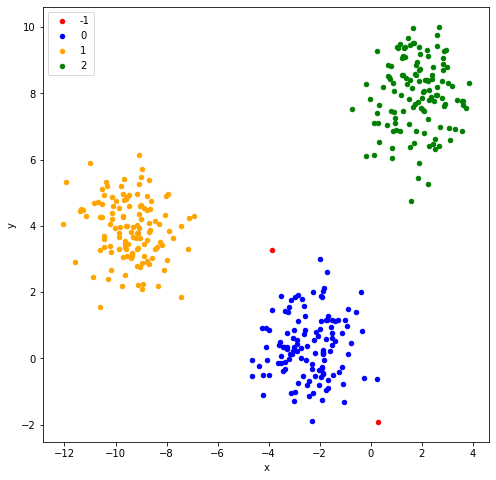

In [13]:
show_clusters(X, clusters)

# KMeans

## Considerações

Método elbow - Utiliza-se para determinar o número ótimo de clusters (_k_). Neste método, para cada _k_ de um certo intervalo de valores, calcula-se a soma dos quadrados das distâncias entre cada ponto e o centróide mais próximo. O valor ótimo de _k_ será aquele a partir do qual a soma dos quadrados das distâncias deixa de variar significativamente.

## Algoritmo

1. Escolher o número de clusters _k_

![Diagrama](./files/kmeans1.png)

2. Selecionar _k_ pontos aleatórios como centróides

![Diagrama](./files/kmeans2.png)

3. Atribuir cada ponto ao cluster cujo centróide se encontra mais próximo

![Diagrama](./files/kmeans3.png)

4. Calcular a média de cada cluster como o novo centróide

![Diagrama](./files/kmeans4.png)

5. Repetir os passos 3 e 4

![Diagrama](./files/kmeans5.png)

![Diagrama](./files/kmeans6.png)

## Implementação em Python

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sum_of_squared_distances = []
k = range(1,10)
for num_clusters in k:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(k, sum_of_squared_distances)
plt.xlabel("k") 
plt.ylabel("Soma dos quadrados das distâncias")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_

In [ ]:
show_clusters(X, clusters)

# Hierarchical Clustering

## Considerações

Métodos de ligação:
- Método de ligação única - A distância entre dois clusters é a distância mínima entre os membros dos dois clusters
- Método de ligação completa - A distância entre dois clusters é a distância máxima entre os membros dos dois clusters
- Método de ligação média entre grupos - A distância entre dois clusters é a média aritmética simples de todas as distâncias entre os membros dos dois clusters
- Método de ligação média entre grupos equilibrada - A distância entre dois clusters é a média aritmética ponderada de todas as distâncias entre os membros dos dois clusters
- Método centróide - A distância entre dois clusters é a distância entre os seus centróides
- Método mediano - A distância entre dois clusters é a mediana de todas as distâncias entre os membros dos dois clusters
- Método de Ward - A distância entre dois clusters é a variância total do resultado da união dos mesmos

Dendrograma - Um dendrograma é um diagrama semelhante a uma árvore que regista as uniões de clusters em cada iteração. No eixo do X encontra-se o identificador de cada observação e no eixo do Y encontra-se a distância. Sempre que dois clusters se unirem, a altura da união corresponderá à distância entre os mesmos. Utiliza-se para determinar o número ótimo de clusters.

## Algoritmo

1. Atribuir todos os pontos a um cluster individual

![Diagrama](./files/hc1.png)

2. Unir os clusters com a menor distância na matriz de proximidade

![Diagrama](./files/hc2.png)

3. Repetir o passo 2 até restar um único cluster

![Diagrama](./files/hc3.png)

![Diagrama](./files/hc4.png)

## Implementação em Python

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
Z = hierarchy.linkage(X, method="ward")

fig, ax = plt.subplots(figsize=(8,8))
dendrogram = hierarchy.dendrogram(Z)

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
clusters = hc.labels_

In [ ]:
show_clusters(X, clusters)

In [15]:
import pandas as pd

In [21]:
df = pd.read_csv("Mall_Customers.csv")

In [22]:
df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]>

<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

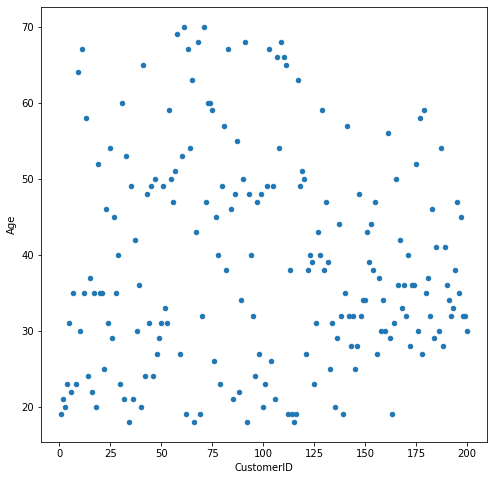

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax = ax, kind = "scatter", x = "CustomerID", y = "Age")

In [26]:
df["ConstumerID"]

KeyError: 'ConstumerID'

In [ ]:
sum_of_squared_distances = []
k = range(1,10)
for num_clusters in k:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit()
    sum_of_squared_distances.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(k, sum_of_squared_distances)
plt.xlabel("k") 
plt.ylabel("Soma dos quadrados das distâncias")
plt.show()